# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)



# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}{city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papatowai
Processing Record 2 of Set 1 | wildwood
Processing Record 3 of Set 1 | lebu
Processing Record 4 of Set 1 | daulatpur
Processing Record 5 of Set 1 | al jawf
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | sitka
Processing Record 8 of Set 1 | berezovyy
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | kerikeri
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | tryavna
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | altay
Processing Record 18 of Set 1 | lahan
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | bei'an
Processing Record 21 of Set 1 | orange city
Processing Record 22 of Set 1 | mandera
Processing Record 23

Processing Record 40 of Set 4 | barranca
Processing Record 41 of Set 4 | matoury
Processing Record 42 of Set 4 | piton saint-leu
Processing Record 43 of Set 4 | santiago de cao
Processing Record 44 of Set 4 | chiknayakanhalli
Processing Record 45 of Set 4 | fort bragg
Processing Record 46 of Set 4 | yuzhno-kurilsk
Processing Record 47 of Set 4 | 'ohonua
City not found. Skipping...
Processing Record 48 of Set 4 | kavaratti
Processing Record 49 of Set 4 | saint-pierre
Processing Record 0 of Set 5 | long beach
Processing Record 1 of Set 5 | medeiros neto
Processing Record 2 of Set 5 | malvan
Processing Record 3 of Set 5 | santa cruz del sur
Processing Record 4 of Set 5 | lompoc
Processing Record 5 of Set 5 | carnarvon
Processing Record 6 of Set 5 | chinchilla
Processing Record 7 of Set 5 | dazuocun
Processing Record 8 of Set 5 | siwa oasis
Processing Record 9 of Set 5 | bol
Processing Record 10 of Set 5 | margaret river
Processing Record 11 of Set 5 | alice springs
Processing Record 12 of

Processing Record 28 of Set 8 | tobi village
City not found. Skipping...
Processing Record 29 of Set 8 | fisterra
Processing Record 30 of Set 8 | ashland
Processing Record 31 of Set 8 | clarksdale
Processing Record 32 of Set 8 | warman
Processing Record 33 of Set 8 | fuerte olimpo
Processing Record 34 of Set 8 | point pedro
Processing Record 35 of Set 8 | fort st. john
Processing Record 36 of Set 8 | spencer
Processing Record 37 of Set 8 | xiva
Processing Record 38 of Set 8 | grande prairie
Processing Record 39 of Set 8 | zeya
Processing Record 40 of Set 8 | yasuj
Processing Record 41 of Set 8 | afaahiti
Processing Record 42 of Set 8 | labytnangi
Processing Record 43 of Set 8 | laascaanood
Processing Record 44 of Set 8 | nantucket
Processing Record 45 of Set 8 | nogliki
Processing Record 46 of Set 8 | illizi
Processing Record 47 of Set 8 | tweed heads
Processing Record 48 of Set 8 | richards bay
Processing Record 49 of Set 8 | hobyo
Processing Record 0 of Set 9 | pasuquin
Processing Re

Processing Record 16 of Set 12 | kapa'a
Processing Record 17 of Set 12 | kegen
Processing Record 18 of Set 12 | cannonvale
Processing Record 19 of Set 12 | zaozersk
Processing Record 20 of Set 12 | kitimat
Processing Record 21 of Set 12 | hadibu
Processing Record 22 of Set 12 | novo aripuana
Processing Record 23 of Set 12 | muntok
Processing Record 24 of Set 12 | newman
Processing Record 25 of Set 12 | el sauzal de rodriguez
Processing Record 26 of Set 12 | tual
Processing Record 27 of Set 12 | el jadid
Processing Record 28 of Set 12 | harnosand
Processing Record 29 of Set 12 | guiratinga
Processing Record 30 of Set 12 | sonsorol village
City not found. Skipping...
Processing Record 31 of Set 12 | hedaru
Processing Record 32 of Set 12 | olyokminsk
Processing Record 33 of Set 12 | kaitong
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [6]:
# Display sample data
city_data_df["Max Temp C"] = city_data_df["Max Temp"] - 273.15 #translate to celsius
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp C
0,papatowai,-46.5619,169.4708,283.91,61,40,9.12,NZ,1702340501,10.76
1,wildwood,38.5828,-90.6629,280.68,47,0,2.06,US,1702340216,7.53
2,lebu,-37.6167,-73.6500,286.71,85,96,2.60,CL,1702340502,13.56
3,daulatpur,26.5015,67.9706,290.97,23,79,1.29,PK,1702340502,17.82
4,al jawf,29.5000,38.7500,289.59,82,97,0.68,SA,1702340502,16.44


In [7]:
# Export the City_Data into a csv

city_data_df.to_csv("../VacationPY/citiesUpdate.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../VacationPY/citiesUpdate.csv", index_col="City_ID")

# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp C
City_ID,,,,,,,,,,
0,papatowai,-46.5619,169.4708,283.91,61,40,9.12,NZ,1702340501,10.76
1,wildwood,38.5828,-90.6629,280.68,47,0,2.06,US,1702340216,7.53
2,lebu,-37.6167,-73.6500,286.71,85,96,2.60,CL,1702340502,13.56
3,daulatpur,26.5015,67.9706,290.97,23,79,1.29,PK,1702340502,17.82
4,al jawf,29.5000,38.7500,289.59,82,97,0.68,SA,1702340502,16.44


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

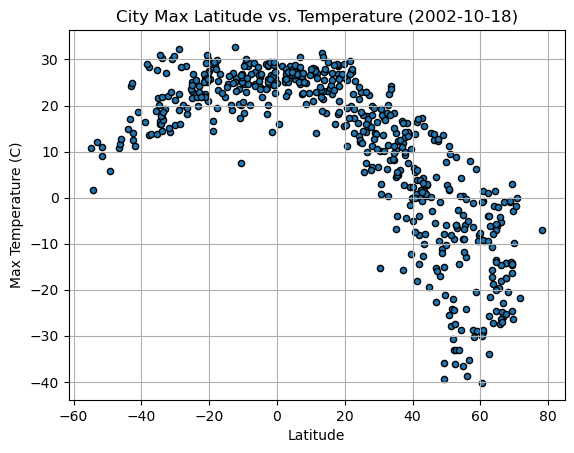

In [9]:
# Build scatter plot for latitude vs. temperature
cityplot = city_data_df.plot(kind = 'scatter', x = 'Lat', y = 'Max Temp C',grid = True, edgecolors='black', title = 'City Max Latitude vs. Temperature (2002-10-18)')
cityplot.set_ylabel("Max Temperature (C)")
cityplot.set_xlabel("Latitude")


# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

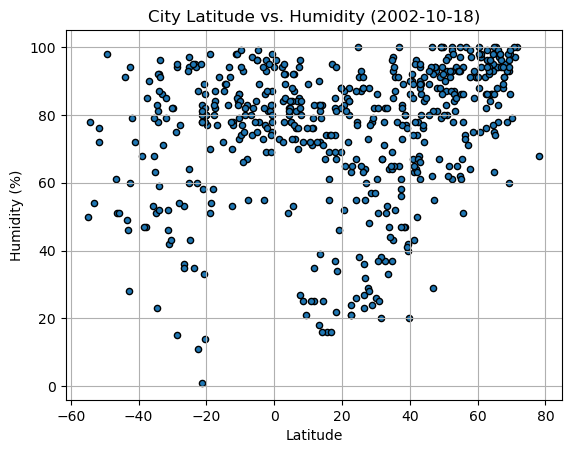

In [10]:
# Build the scatter plots for latitude vs. humidity
cityplot = city_data_df.plot(kind = 'scatter', x = 'Lat', y = 'Humidity',grid = True, edgecolors='black', title = 'City Latitude vs. Humidity (2002-10-18)')
cityplot.set_ylabel("Humidity (%)")
cityplot.set_xlabel("Latitude")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

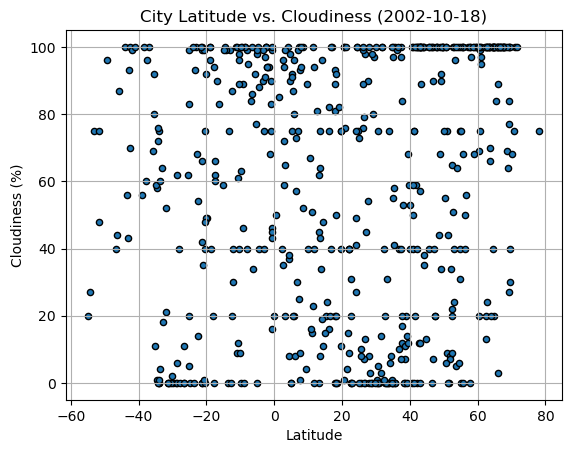

In [11]:
# Build the scatter plots for latitude vs. cloudiness
cityplot = city_data_df.plot(kind = 'scatter', x = 'Lat', y = 'Cloudiness',grid = True, edgecolors='black', title = 'City Latitude vs. Cloudiness (2002-10-18)')
cityplot.set_ylabel("Cloudiness (%)")
cityplot.set_xlabel("Latitude")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

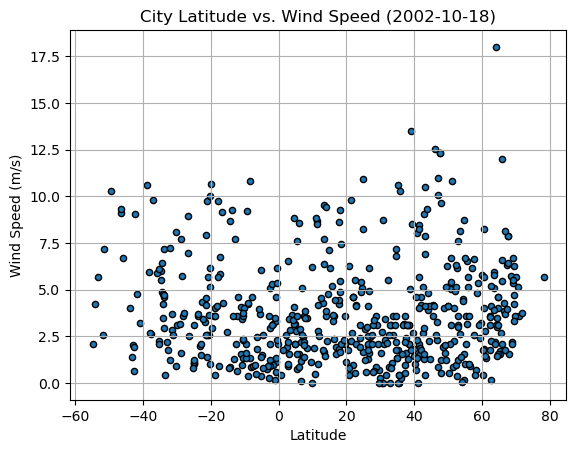

In [12]:
# Build the scatter plots for latitude vs. wind speed
cityplot = city_data_df.plot(kind = 'scatter', x = 'Lat', y = 'Wind Speed',grid = True, edgecolors='black', title = 'City Latitude vs. Wind Speed (2002-10-18)')
cityplot.set_ylabel("Wind Speed (m/s)")
cityplot.set_xlabel("Latitude")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# using Matplotlib

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>0]

# Display sample data
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp C
City_ID,,,,,,,,,,
1,wildwood,38.5828,-90.6629,280.68,47,0,2.06,US,1702340216,7.53
3,daulatpur,26.5015,67.9706,290.97,23,79,1.29,PK,1702340502,17.82
4,al jawf,29.5000,38.7500,289.59,82,97,0.68,SA,1702340502,16.44
5,yellowknife,62.4560,-114.3525,247.44,76,20,3.60,CA,1702340401,-25.71
6,sitka,57.0531,-135.3300,281.09,71,100,6.17,US,1702340504,7.94
...,...,...,...,...,...,...,...,...,...,...
546,el sauzal de rodriguez,31.9000,-116.6833,290.05,67,100,2.13,MX,1702340737,16.90
548,el jadid,33.2549,-8.5060,291.11,82,31,0.79,MA,1702340738,17.96
549,harnosand,62.6323,17.9379,269.15,94,100,5.22,SE,1702340738,-4.00


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp C
City_ID,,,,,,,,,,
0,papatowai,-46.5619,169.4708,283.91,61,40,9.12,NZ,1702340501,10.76
2,lebu,-37.6167,-73.6500,286.71,85,96,2.60,CL,1702340502,13.56
8,edinburgh of the seven seas,-37.0676,-12.3116,287.04,90,100,9.78,SH,1702340504,13.89
9,kerikeri,-35.2268,173.9474,294.77,63,11,2.24,NZ,1702340505,21.62
10,puerto natales,-51.7236,-72.4875,282.13,72,48,2.55,CL,1702340505,8.98


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8362349790263003
R-Squared is 0.6992889401471168


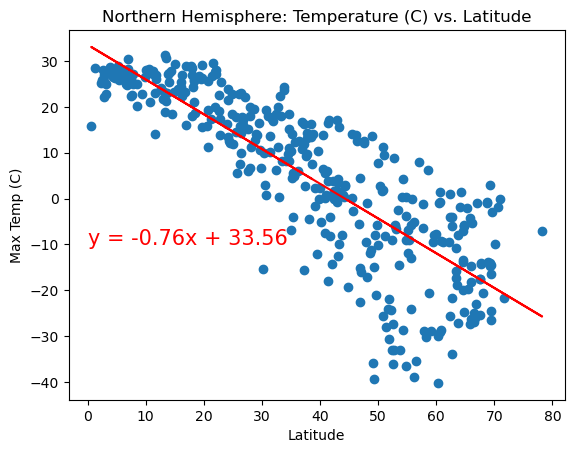

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp C']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f'The r-value is {rvalue}')
print(f'R-Squared is {rvalue ** 2}')
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)
plt.annotate(line_eq,(0,-10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.title('Northern Hemisphere: Temperature (C) vs. Latitude')
plt.show()

The r-value is 0.5688135712233343
R-Squared is 0.3235488788078432


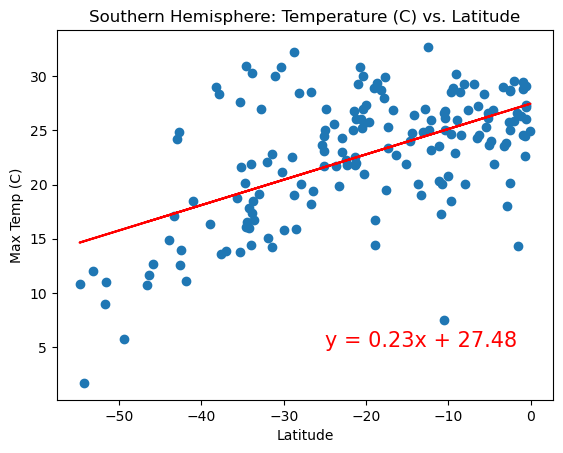

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp C']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f'The r-value is {rvalue}')
print(f'R-Squared is {rvalue ** 2}')
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)
plt.annotate(line_eq,(-25,5),fontsize=15,color="red")
plt.title('Southern Hemisphere: Temperature (C) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.show()

**Discussion about the linear relationship:** 

The tempurature goes up the closer you get to the equator (equator = 0 latitude). What is interesting is that it goes down at a much faster rate moving south than it does moving north. Looks like Southern countries tend to be hotter. 





### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.3605138370203441
R-Squared is 0.12997022668313124


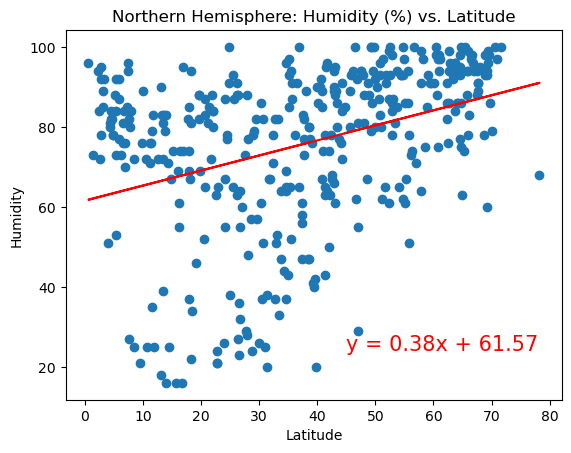

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f'The r-value is {rvalue}')
print(f'R-Squared is {rvalue ** 2}')
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)
plt.annotate(line_eq,(45,24),fontsize=15,color="red")
plt.title("Northern Hemisphere: Humidity (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-value is 0.3207658013106076
R-Squared is 0.1028906992904362


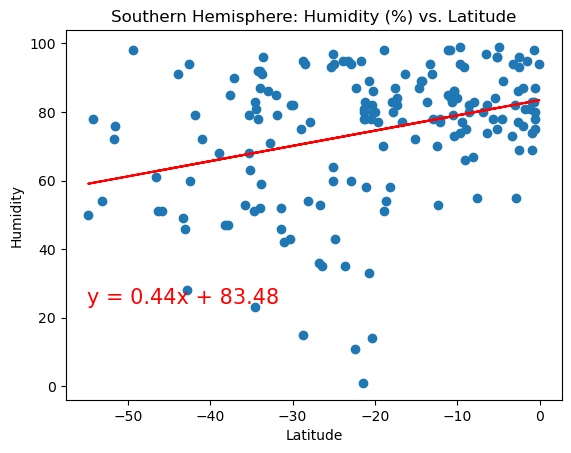

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f'The r-value is {rvalue}')
print(f'R-Squared is {rvalue ** 2}')
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)
plt.annotate(line_eq,(-55,24),fontsize=15,color="red")
plt.title("Southern Hemisphere: Humidity (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.25711378108711563
R-Squared is 0.06610749642491322


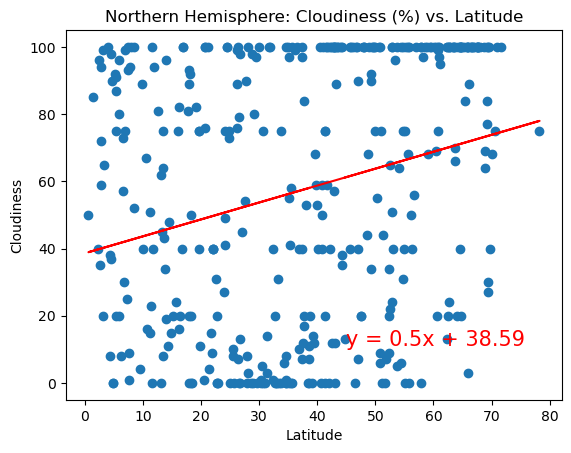

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f'The r-value is {rvalue}')
print(f'R-Squared is {rvalue ** 2}')
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)
plt.annotate(line_eq,(45,11),fontsize=15,color="red")
plt.title("Northern Hemisphere: Cloudiness (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-value is 0.21370669930538416
R-Squared is 0.045670553328001885


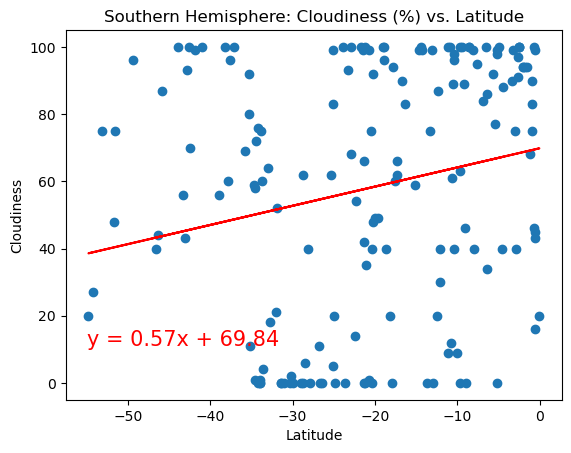

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f'The r-value is {rvalue}')
print(f'R-Squared is {rvalue ** 2}')
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)
plt.annotate(line_eq,(-55,11),fontsize=15,color="red")
plt.title("Southern Hemisphere: Cloudiness (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** When it came to Cloudiness and Humidity, I noticed a much stronger trend moving north of the equator. Humidity moving from the south to the equator does not change much, while humidity from the equator to the north increasing at a staggering rate. Same applies with Cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.12264101069025563
R-Squared is 0.015040817503127395


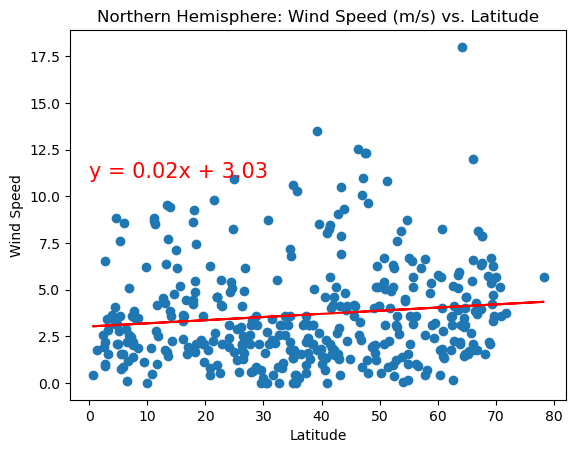

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f'The r-value is {rvalue}')
print(f'R-Squared is {rvalue ** 2}')
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)
plt.annotate(line_eq,(0,11),fontsize=15,color="red")
plt.title("Northern Hemisphere: Wind Speed (m/s) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-value is -0.28769655647989345
R-Squared is 0.08276930861038852


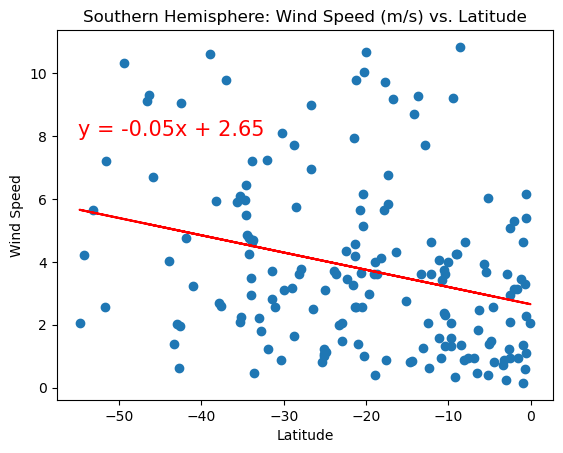

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f'The r-value is {rvalue}')
print(f'R-Squared is {rvalue ** 2}')
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)
plt.annotate(line_eq,(-55,8),fontsize=15,color="red")
plt.title("Southern Hemisphere: Wind Speed (m/s) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** Wind Speed increases the farther north you move, but at a much lower rate than Cloudiness and Humidity.